In [2]:
from Bio.PDB import *

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from molecular_data import resdict, restype, color, colorrgba

#Desglosamos archivo PDB
parser = PDBParser(QUIET=True,PERMISSIVE=True)
structure = parser.get_structure('MACROH2A', 'data/1yd9.pdb')

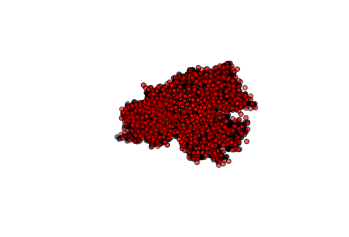

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for atom_type, color in colors.iteritems():
        atoms = [atom for atom in structure.get_atoms() if atom.get_id() == atom_type]
        coordinates = [atom.coord for atom in atoms]
        if not len(atoms)==0:
            x,y,z=zip(*coordinates)
            ax.scatter(x, y, z, c=color, marker='o')
            ax.axis("off")
        
plt.show()

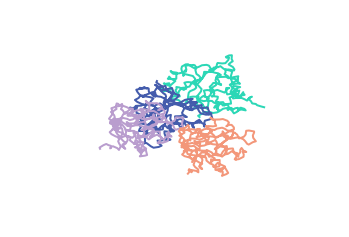

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for chain in structure.get_chains():
        can_atoms = [atom for atom in chain.get_atoms() if atom.get_name() == 'CA' or atom.get_name() == 'N']
        can_coordinates = [atom.coord for atom in can_atoms]
        x,y,z=zip(*can_coordinates)
        ccolor = np.random.rand(3,1)
        ax.plot(x, y, z, c=ccolor, linewidth=2)
        ax.axis("off")
        
plt.show()

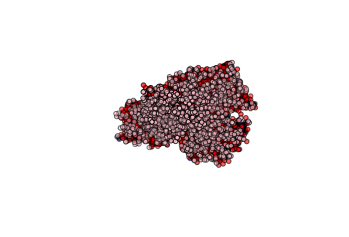

In [57]:
#Creamos el modelo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for atom_type, color in colors.iteritems():
        atoms = [atom for atom in structure.get_atoms() if atom.get_id() == atom_type]
        coordinates = [atom.coord for atom in atoms]
        if not len(atoms)==0:
            x,y,z=zip(*coordinates)
            ax.scatter(x, y, z, c=color, marker='o')
            ax.axis("off")

            
#Añadimos los atomos que no estan en el diccionario            
atoms_1 = [atom for atom in structure.get_atoms()]
atoms_2 = [atom for atom in structure.get_atoms() if atom.get_id() in colors.keys()]

atoms_pink = list(set(atoms_1)-set(atoms_2))

coordinates_pink = [atom.coord for atom in atoms_pink]
xp, yp, zp = zip(*coordinates_pink)
ax.scatter(xp, yp, zp, c='pink', marker='o')
ax.axis("off")

plt.show()

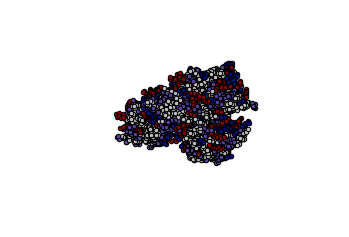

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

residues = [residue for residue in structure.get_residues() if residue.get_resname() in resdict.keys()]
for residue in residues:
    resid = residue.get_resname()
    rescolor = colorrgba(restype(resid))
    atoms = [atom for atom in residue.get_atoms()]
    for atom in atoms:
        x, y, z = atom.coord
        ax.scatter(x, y, z, c=rescolor, marker='o')
        ax.axis("off")
        
plt.show()
        

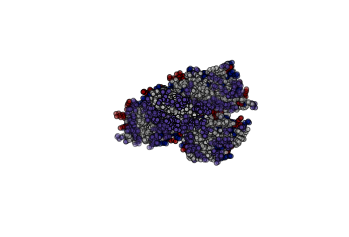

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for resname, residuetype in resdict.iteritems():
    residues = [residue for residue in structure.get_residues() if residue.get_resname() == resname]
    rescoord = []
    color = colorrgba(residuetype)
    for residue in residues:
        atoms = [atom for atom in residue.get_atoms()]
        coordinates = [atom.coord for atom in atoms]
        rescoord.append(np.array(coordinates))
    if len(rescoord)>1:
        rescoord = np.concatenate(rescoord)
    if not len(residues)==0:
        x, y, z =zip(*rescoord)
        ax.scatter(x, y, z, c=color, marker='o')
        ax.axis("off")

plt.show()
    

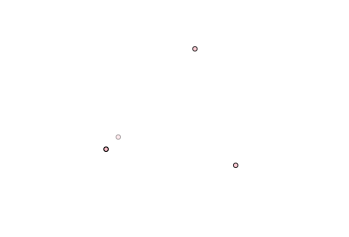

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

residues_1 = [residue for residue in structure.get_residues() if residue.get_resname() != 'HOH']
residues_2 = [residue for residue in structure.get_residues() if residue.get_resname() in resdict.keys()]

residues_pink = list(set(residues_1)-set(residues_2))
rescoordpink = []
for residue in residues_pink:
    atomspink = [atom for atom in residue.get_atoms()]
    coordinatespink = [atom.coord for atom in atomspink]
    rescoordpink.append(np.array(coordinatespink))
if len(rescoordpink)>1:
    rescoordpink = np.concatenate(rescoordpink)
xp, yp, zp = zip(*rescoordpink)
ax.scatter(xp, yp, zp, c='pink', marker='o')
ax.axis("off")

plt.show()

In [51]:
rescoordpink

array([[-41.3429985 , -17.80900002,  26.67399979],
       [-32.8370018 , -52.07699966,  34.04600143],
       [ -6.4920001 , -19.05200005,  25.16600037],
       [-26.73999977,   7.13700008,  62.42699814]], dtype=float32)